In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/train/',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 10813 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/val/',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 1319 images belonging to 15 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

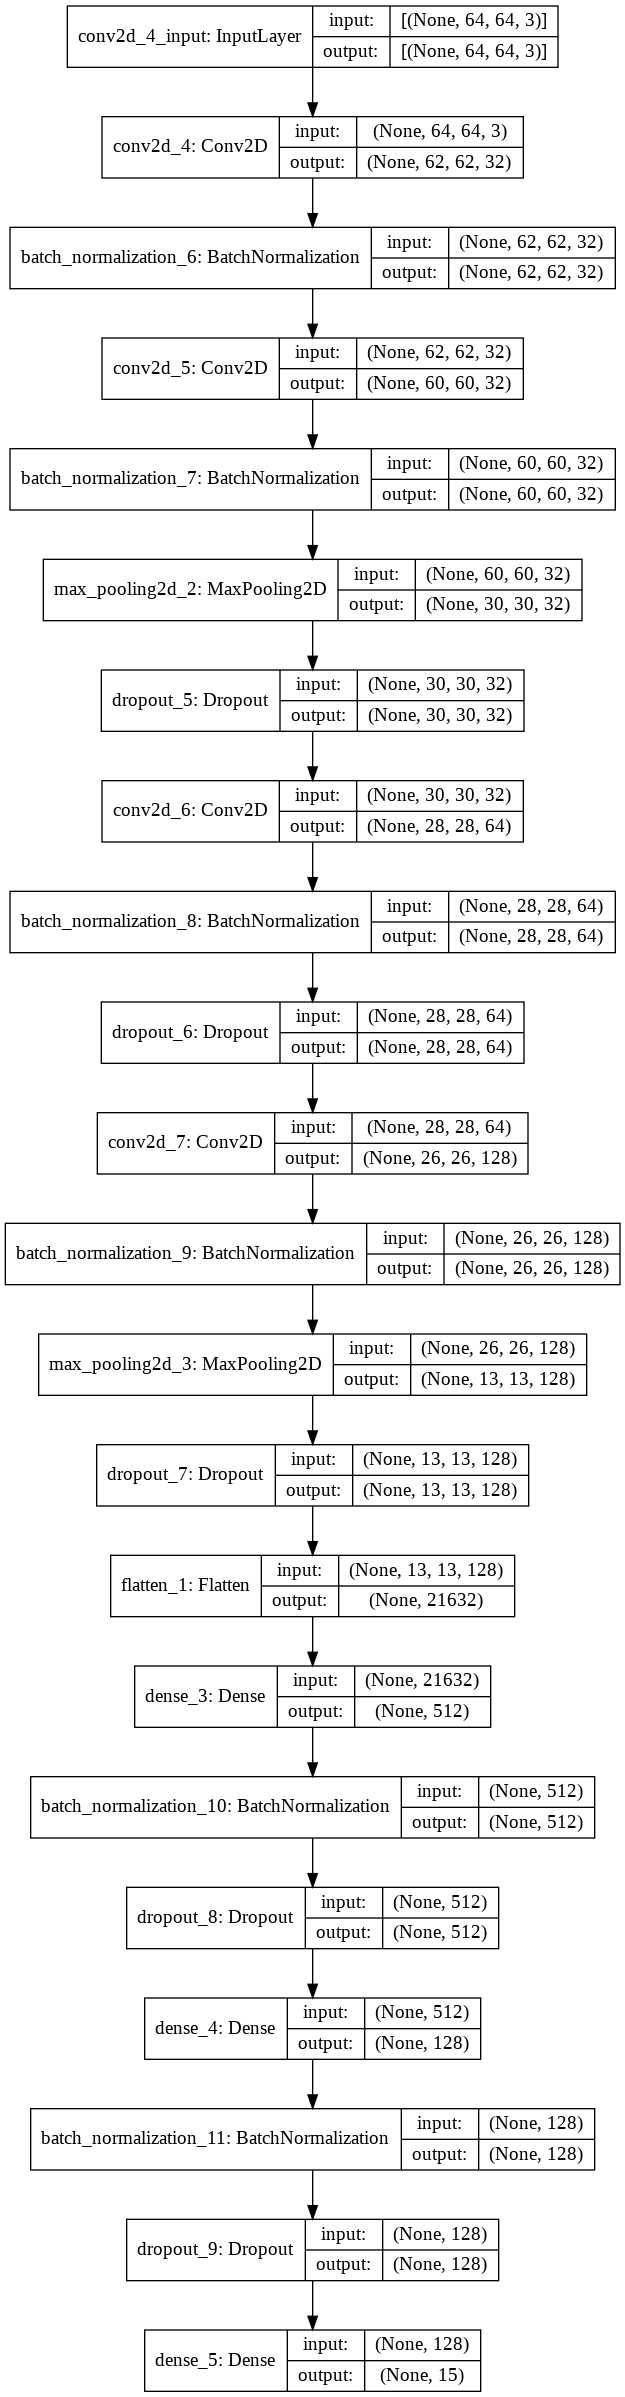

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=32,epochs=50,callbacks=[history])

Epoch 1/50
338/338 [==============================] - 806s 2s/step - loss: 3.4780 - accuracy: 0.1495 - val_loss: 3.4884 - val_accuracy: 0.1463
Epoch 2/50
338/338 [==============================] - 351s 1s/step - loss: 2.9146 - accuracy: 0.2203 - val_loss: 2.3576 - val_accuracy: 0.2782
Epoch 3/50
338/338 [==============================] - 356s 1s/step - loss: 2.6522 - accuracy: 0.2589 - val_loss: 2.1332 - val_accuracy: 0.3525
Epoch 4/50
338/338 [==============================] - 370s 1s/step - loss: 2.4781 - accuracy: 0.2891 - val_loss: 2.1943 - val_accuracy: 0.3366
Epoch 5/50
338/338 [==============================] - 377s 1s/step - loss: 2.3678 - accuracy: 0.3167 - val_loss: 2.0537 - val_accuracy: 0.3662
Epoch 6/50
338/338 [==============================] - 360s 1s/step - loss: 2.2698 - accuracy: 0.3364 - val_loss: 1.9246 - val_accuracy: 0.3897
Epoch 7/50
338/338 [==============================] - 364s 1s/step - loss: 2.1930 - accuracy: 0.3497 - val_loss: 1.8939 - val_accuracy: 0.4041

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])

In [ ]:
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))